In [ ]:
# install datasets library
!pip install datasets

# import libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/785741 [00:00<?, ? examples/s]

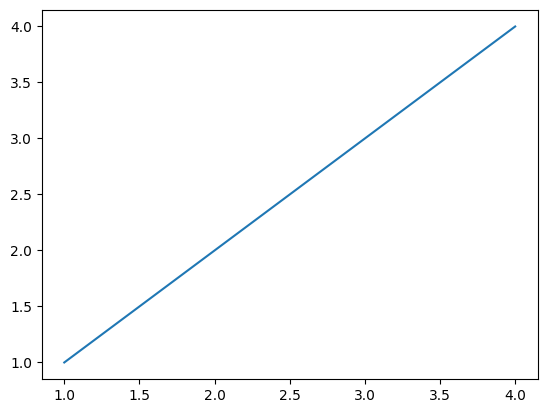

In [ ]:
x = [1, 2, 3, 4]
y = [1, 2, 3, 4]

plt.plot(x,y)

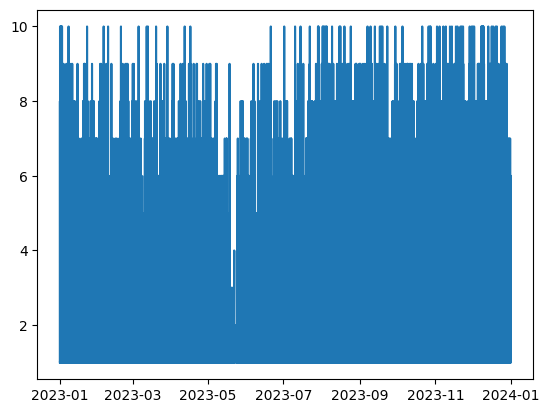

In [ ]:
date_counts = df.job_posted_date.value_counts()

# sorting date_counts
date_counts = date_counts.sort_index()

# need x and y values as arguemnts to plot()
plt.plot(date_counts.index, date_counts)

In [ ]:
df['job_posted_month'] = df['job_posted_date'].dt.month

monthly_counts = df.job_posted_month.value_counts()

monthly_counts = monthly_counts.sort_index()

monthly_counts

job_posted_month
1     91822
2     64578
3     64084
4     62919
5     52104
6     61572
7     63777
8     75162
9     62359
10    66611
11    64450
12    56303
Name: count, dtype: int64

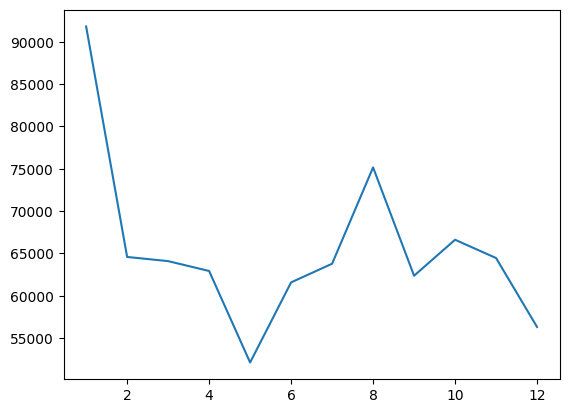

In [ ]:
plt.plot(monthly_counts.index, monthly_counts)

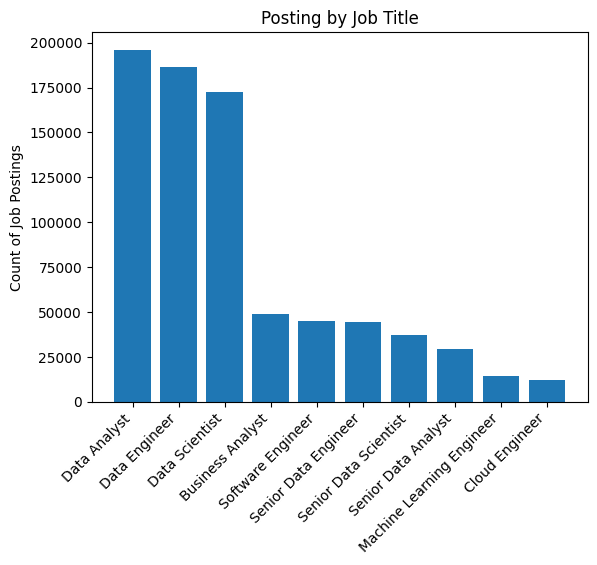

In [ ]:
# bar charts - counts of job postings

job_counts = df.job_title_short.value_counts()

# horizontal bar plot using barh, sort job_counts using sort_values
job_counts = job_counts.sort_values(ascending = False)

plt.bar(job_counts.index, job_counts)
plt.title('Posting by Job Title')
plt.ylabel('Count of Job Postings')
plt.xticks(rotation=45, ha='right') # rotates x-axis labels 45 degrees
plt.show()

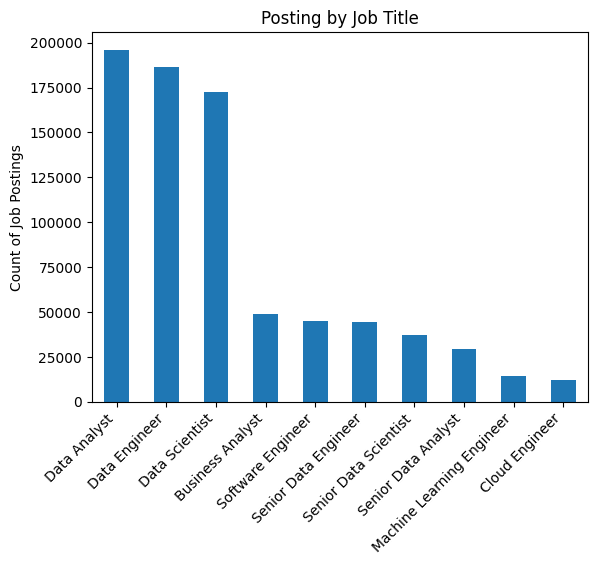

In [ ]:
# pandas shortcut for plotting data

job_counts.plot(kind = 'bar')
plt.title('Posting by Job Title')
plt.xlabel('')
plt.ylabel('Count of Job Postings')
plt.xticks(rotation=45, ha='right') # rotates x-axis labels 45 degrees
plt.show()

In [ ]:
df[['job_posted_date', 'salary_year_avg']].dropna(subset=['salary_year_avg'])

,job_posted_date,salary_year_avg
28,2023-08-01 13:37:57,109500.0
77,2023-06-26 14:22:54,140000.0
92,2023-02-21 13:29:59,120000.0
100,2023-07-31 13:01:18,228222.0
109,2023-10-12 13:02:19,89000.0
...,...,...
785624,2023-08-31 06:02:16,139216.0
785641,2023-01-04 16:36:07,150000.0
785648,2023-04-12 06:02:51,221875.0
785682,2023-03-04 06:16:08,157500.0


<Axes: xlabel='job_posted_date'>

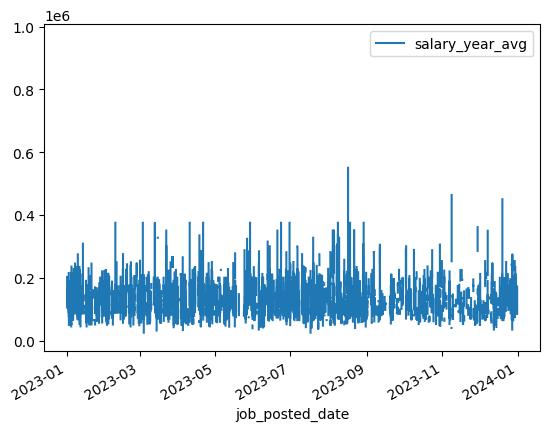

In [ ]:
df.plot(x = 'job_posted_date', y = 'salary_year_avg', kind = 'line')

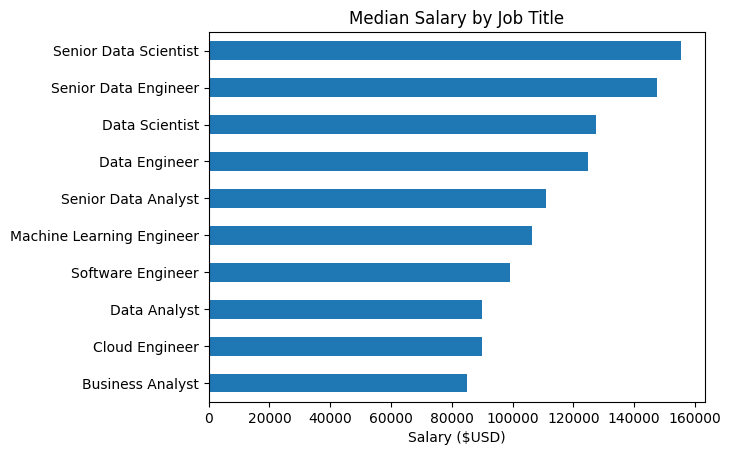

In [ ]:
# median salary vs data science jobs

job_salary = df.groupby('job_title_short')['salary_year_avg'].median().sort_values()

job_salary.plot(kind = 'barh')
plt.xlabel('Salary ($USD)')
plt.ylabel('')
plt.title('Median Salary by Job Title')
plt.show()